# Fraudlock Holems - Credit Card Fraud Detection using Machine Learning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

## Extract Data

In [2]:
# Extract the fraud data from the CSV file and create a dataframe
data = pd.read_csv('creditcard.csv')

# Print the shape of the data
print(data.shape)

(284807, 31)


## Explore the Dataset

count    28481.000000
mean        89.957884
std        270.894630
min          0.000000
25%          5.980000
50%         22.350000
75%         78.930000
max      19656.530000
Name: Amount, dtype: float64
0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432
+-------------+-------------+
| Fraud Cases | Valid Cases |
+-------------+-------------+
|      49     |    28432    |
+-------------+-------------+
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


/home/anthony/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


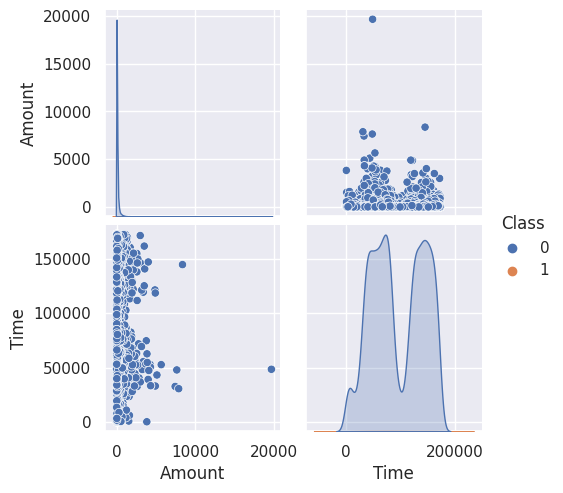

<Figure size 1200x900 with 0 Axes>

<Axes: >

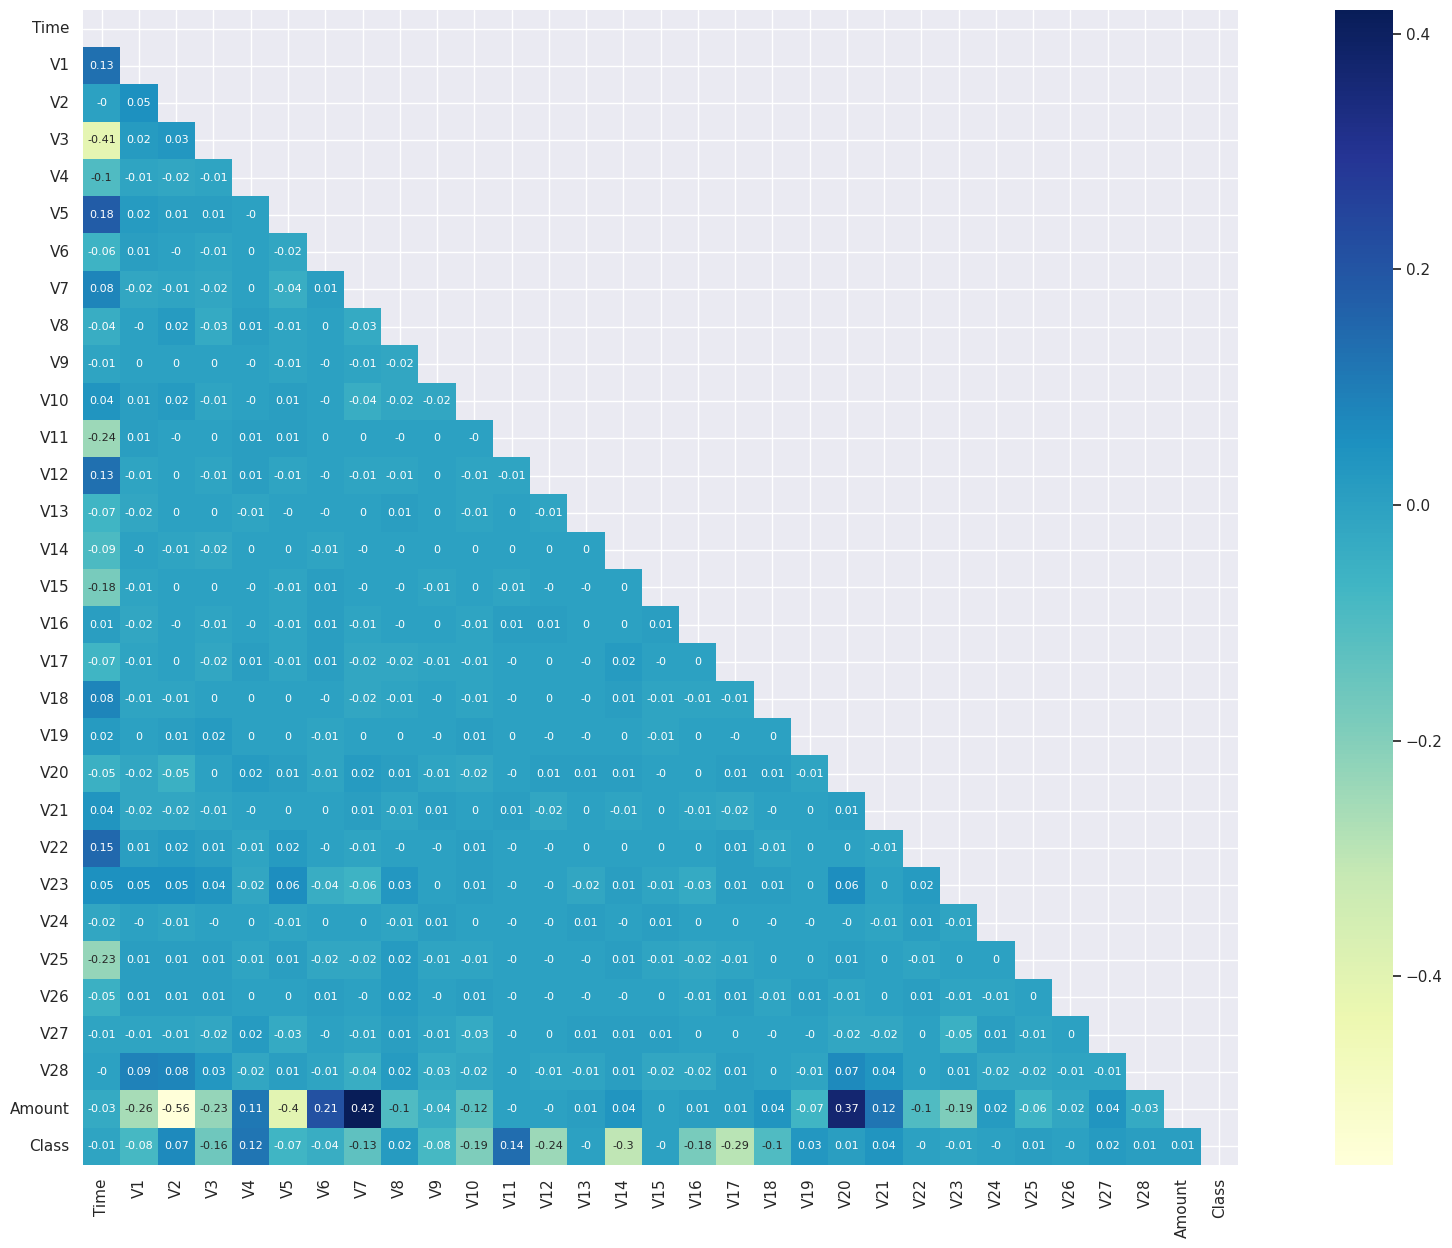

In [17]:

print(data["Amount"].describe())


# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

# create plotted table of fraud and valid cases
table = PrettyTable(["Fraud Cases", "Valid Cases"])
table.add_row([len(fraud), len(valid)])
print(table)

# Check for Null values
print(data.isnull().sum())

# Plot histograms of each parameter using seaborn
sns.pairplot(data=data, hue='Class', vars=['Amount', 'Time'])

fig = plt.figure(figsize = (12, 9))
plt.show()


# Creatre a correlation matrix
plt.subplots(figsize=(25,15)) # set size of plot
corrmat = data.corr().round(2) # create correlation matrix (rounded to 2 decimals)
mask = np.triu(np.ones_like(corrmat, dtype=bool)) # create a mask to hide the upper triangle of the matrix
sns.heatmap(corrmat, annot= True, square = True, cmap="YlGnBu", mask=mask, annot_kws={"fontsize":8}) # plot heatmap



## Feature Engineering

NameError: name 'Y' is not defined

## Model Creation

In [4]:
# Create the Test and Train Splits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the target class
X = data.drop(['Class'], axis=1)
y = data['Class']

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [132]:
# Create the SGD Classifier model
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
model = SGDClassifier(loss='log_loss', max_iter=500, penalty='l2')
scalar = StandardScaler()
# rbf = RBFSampler(gamma=1, random_state=1)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under), ('rbf', rbf), ('m', model)]
steps = [('o', over), ('u', under), ('s', scalar), ('m', model)]
pipeline = Pipeline(steps=steps)

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

In [5]:
# Create the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import RBFSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
model = RandomForestClassifier(n_estimators=100, random_state=1)
# rbf = RBFSampler(gamma=1, random_state=1)
scalar = StandardScaler()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under), ('rbf', rbf), ('m', model)]
steps = [('o', over), ('u', under), ('s', scalar), ('m', model)]
pipeline = Pipeline(steps=steps)

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

## Model Evaluation

In [6]:
# import validation libraries
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# evalute pipeline
cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
score = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cross_val, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(score))


#plot the roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = pipeline.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)



Mean ROC AUC: 0.977
AUC: 0.980


AUC: 0.980


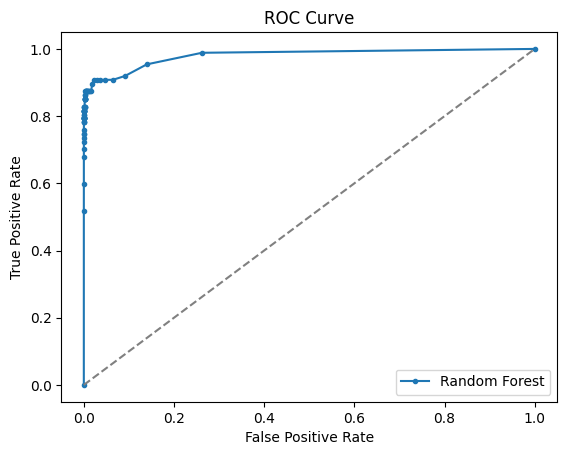

In [8]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# plot the roc curve for the model
# pyplot.plot(fpr, tpr, marker='.', label='SGD Classifier')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')

# plot line 0 - 1
pyplot.plot([0, 1], [0, 1], color='grey', linestyle='--')

# title
pyplot.title('ROC Curve')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Create Confusion Matrix

SGD model scores
accuracy: 0.999
precision: 0.651
recall: 0.793
f1: 0.715
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.65      0.79      0.72        87

    accuracy                           1.00     56962
   macro avg       0.83      0.90      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56838    37]
 [   18    69]]


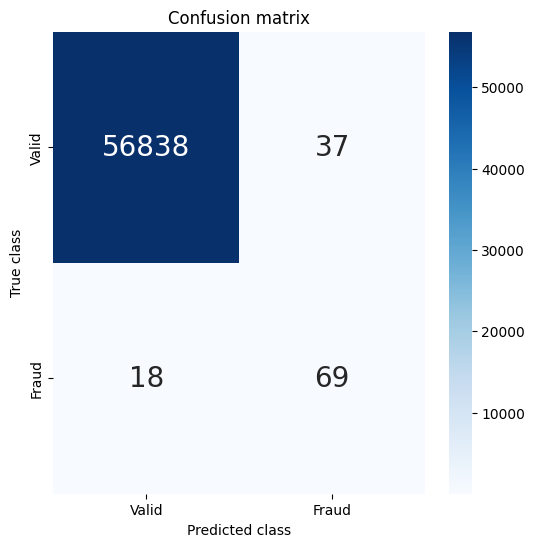

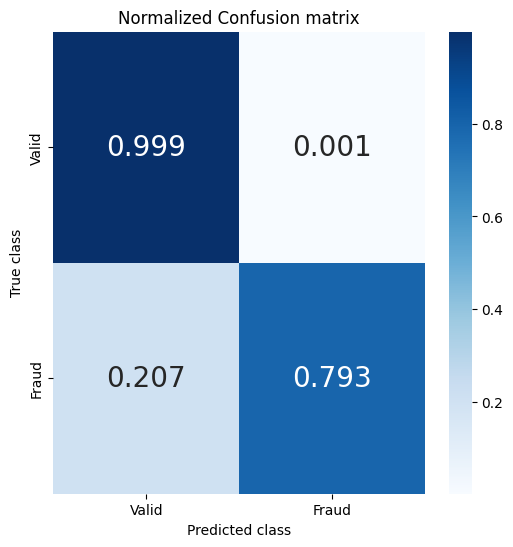

In [10]:
# Print the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix


# Print the accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('SGD model scores')
print('accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('precision: %.3f' % precision_score(y_test, y_pred))
print('recall: %.3f' % recall_score(y_test, y_pred))
print('f1: %.3f' % f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"fontsize":20}, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Normalized Confusion Matrix
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".3f", annot_kws={"fontsize":20}, cmap=plt.cm.Blues)
plt.title("Normalized Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

